           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS  

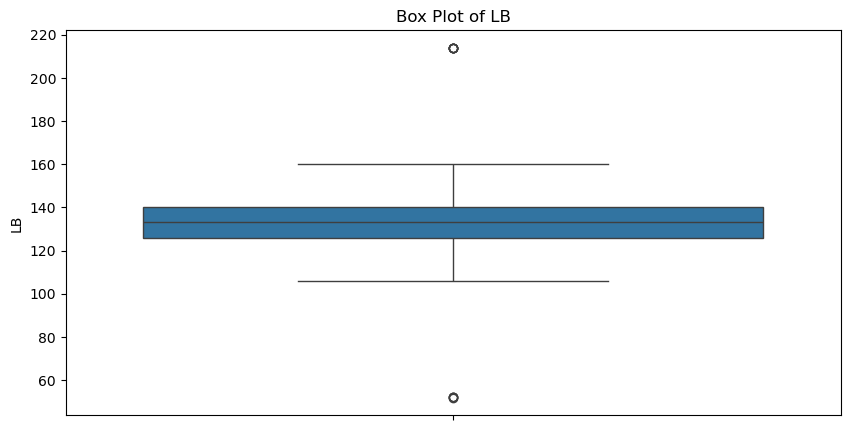

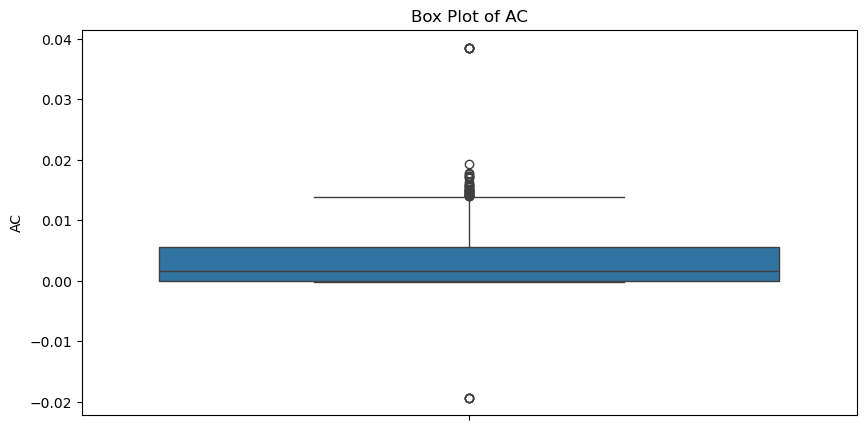

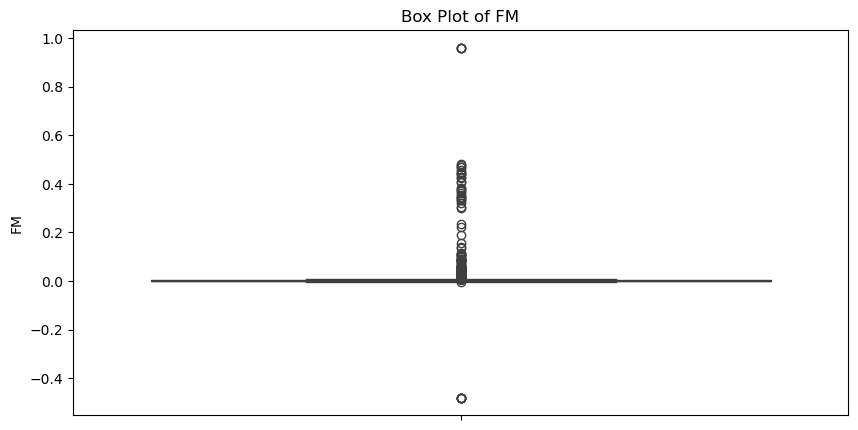

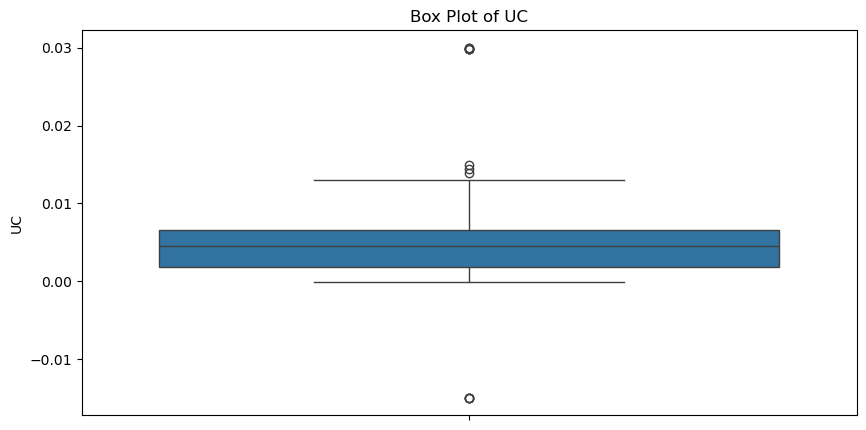

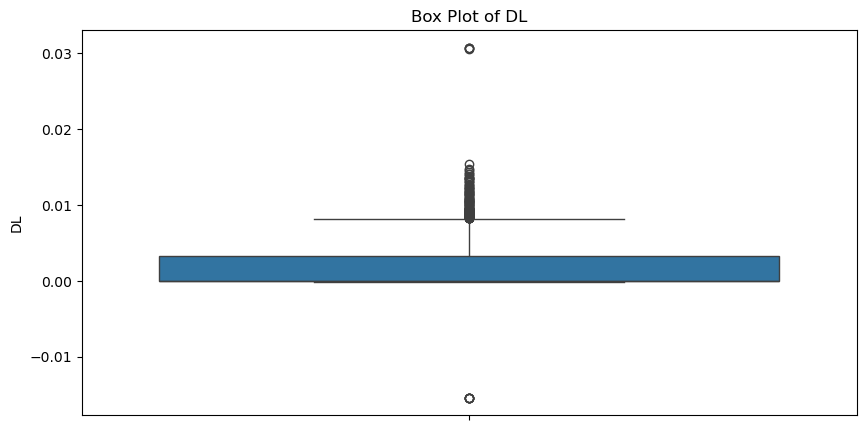

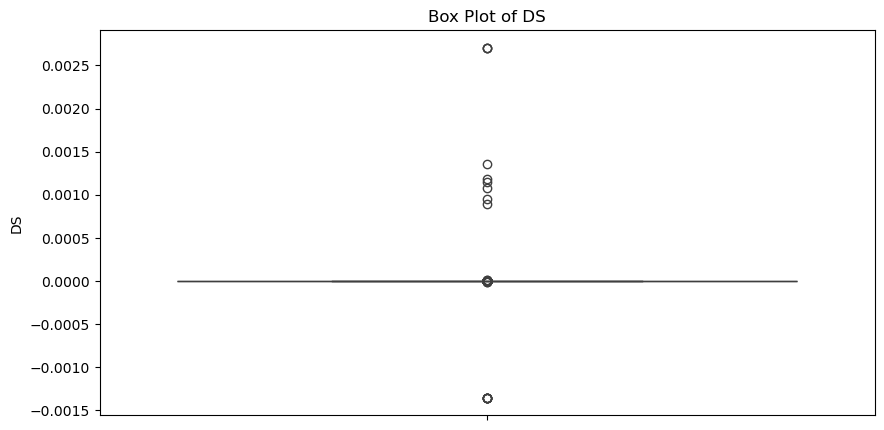

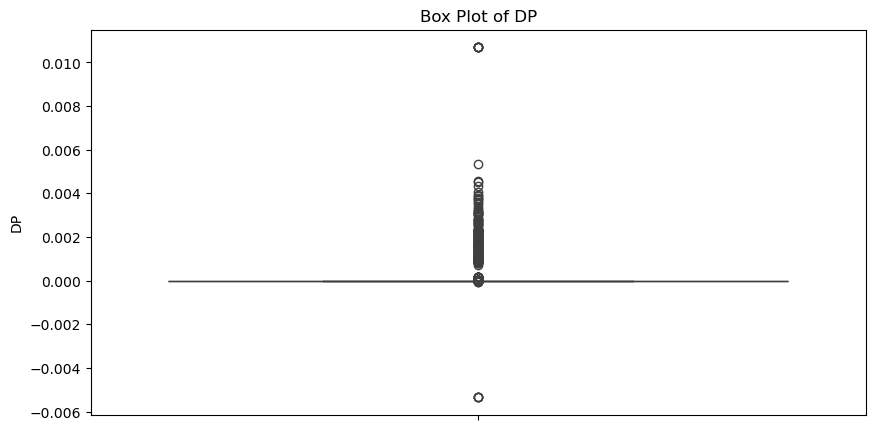

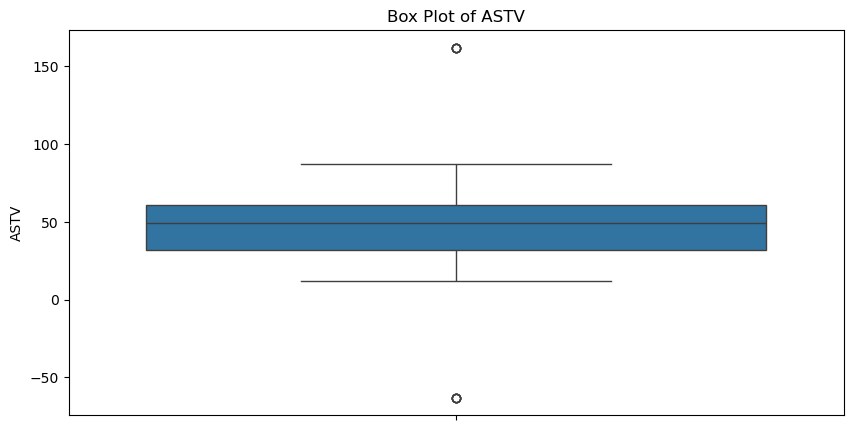

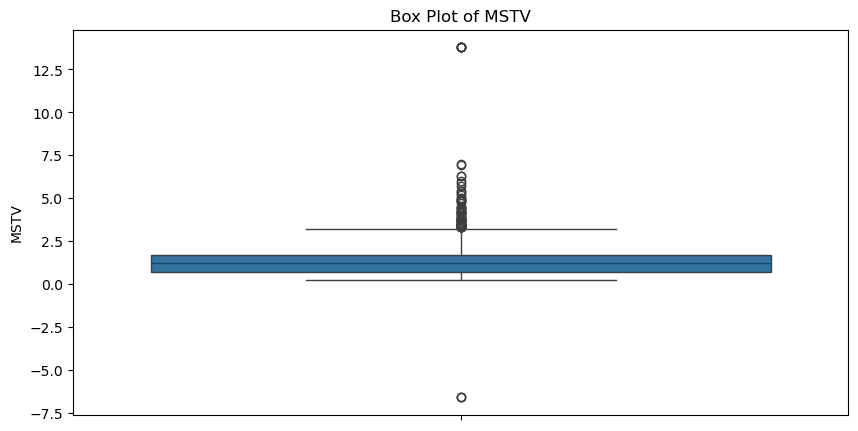

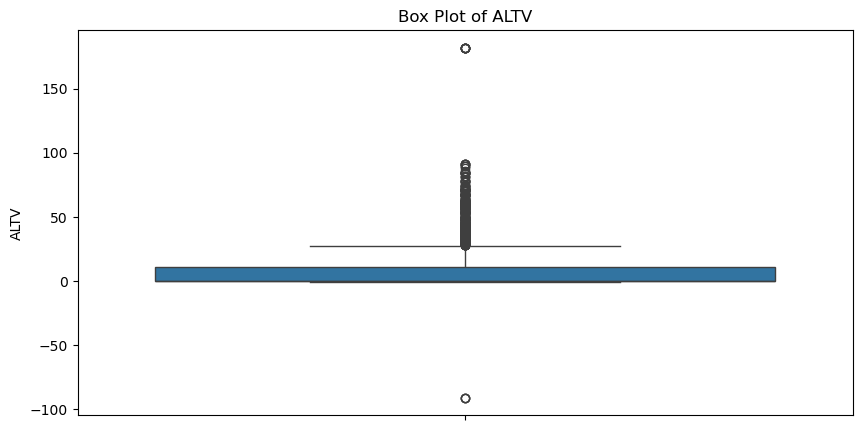

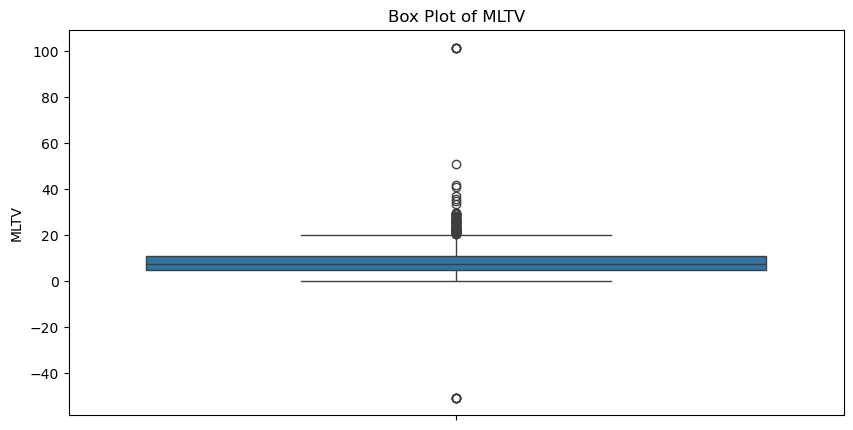

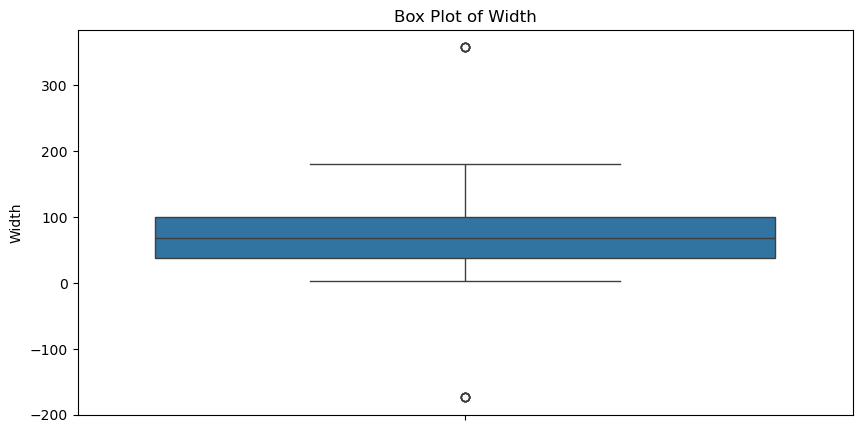

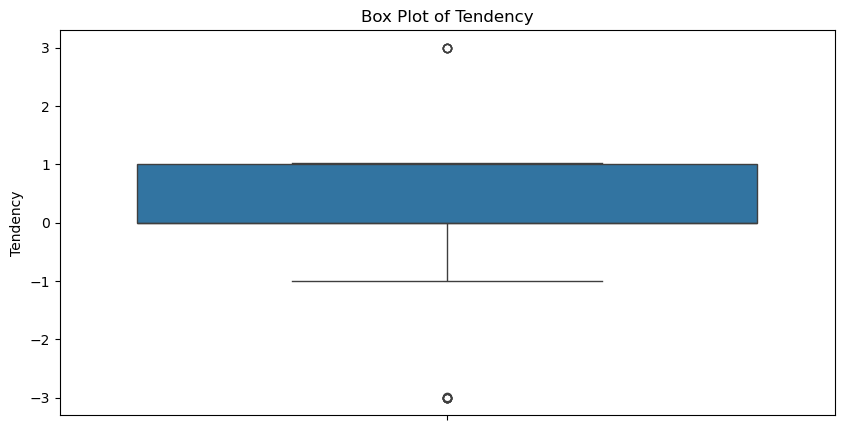

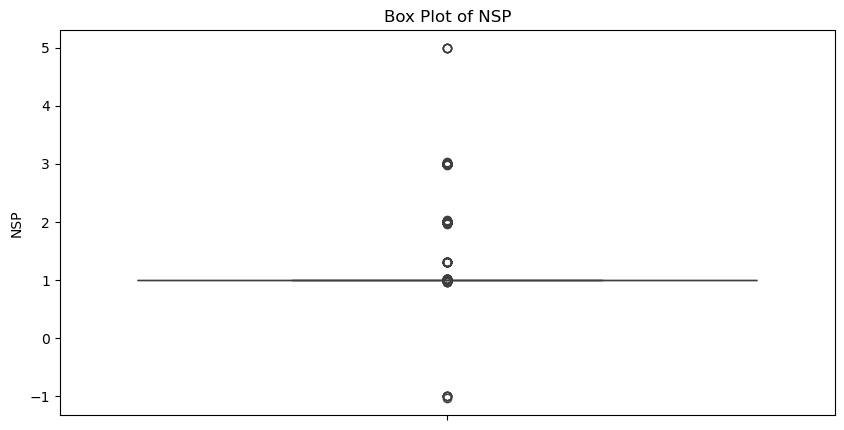

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\EDA1 (1)\\EDA1\\Cardiotocographic.csv")

# Display the first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values for numerical columns with the mean
df.fillna(df.mean(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
# Remove rows with any missing values
df.dropna(inplace=True)

# Alternatively, remove columns with a high percentage of missing values
threshold = 0.5  # 50% threshold
df.dropna(axis=1, thresh=int(threshold * len(df)), inplace=True)

# Check data types
print(df.dtypes)

# Convert data types if necessary
# For instance, convert columns to numeric if they're mistakenly stored as strings
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
df['AC'] = pd.to_numeric(df['AC'], errors='coerce')
# Repeat for other relevant columns
from scipy import stats

# Compute Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)

# Define a threshold
threshold = 3
outliers = (abs_z_scores > threshold).all(axis=1)

# Print the number of outliers
print(f"Number of outliers: {outliers.sum()}")
import seaborn as sns
import matplotlib.pyplot as plt

# Generate box plots for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
# Cap values to a certain percentile range (e.g., 1st and 99th percentiles)
lower_bound = df['LB'].quantile(0.01)
upper_bound = df['LB'].quantile(0.99)
df['LB'] = df['LB'].clip(lower=lower_bound, upper=upper_bound)

# Remove outliers based on a threshold for Z-scores
df = df[~outliers]

In [2]:
import pandas as pd


# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\EDA1 (1)\\EDA1\\Cardiotocographic.csv")

# Display the first few rows of the dataset
print(df.head())
import numpy as np

# Function to calculate IQR
def calculate_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q3 - Q1

# Summary statistics for each variable
summary_stats = df.describe(include='all').transpose()

# Add median and IQR to the summary statistics
summary_stats['median'] = df.median()
summary_stats['IQR'] = df.apply(calculate_iqr)

print(summary_stats)


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
           count        mean        std         min         25%         50%  \
LB        2105.0  133.343598  11.270154   51.842487  126.000000  133.000000   
AC        2106.0    0.003219   0.004391   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


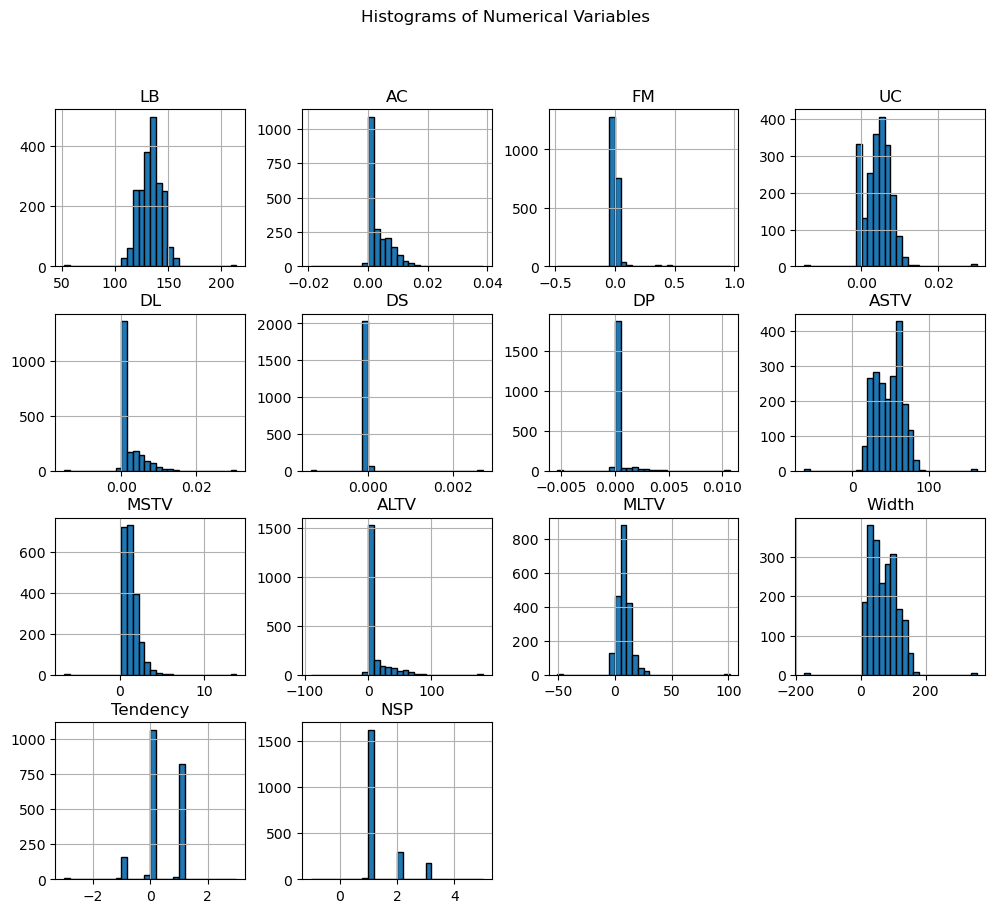

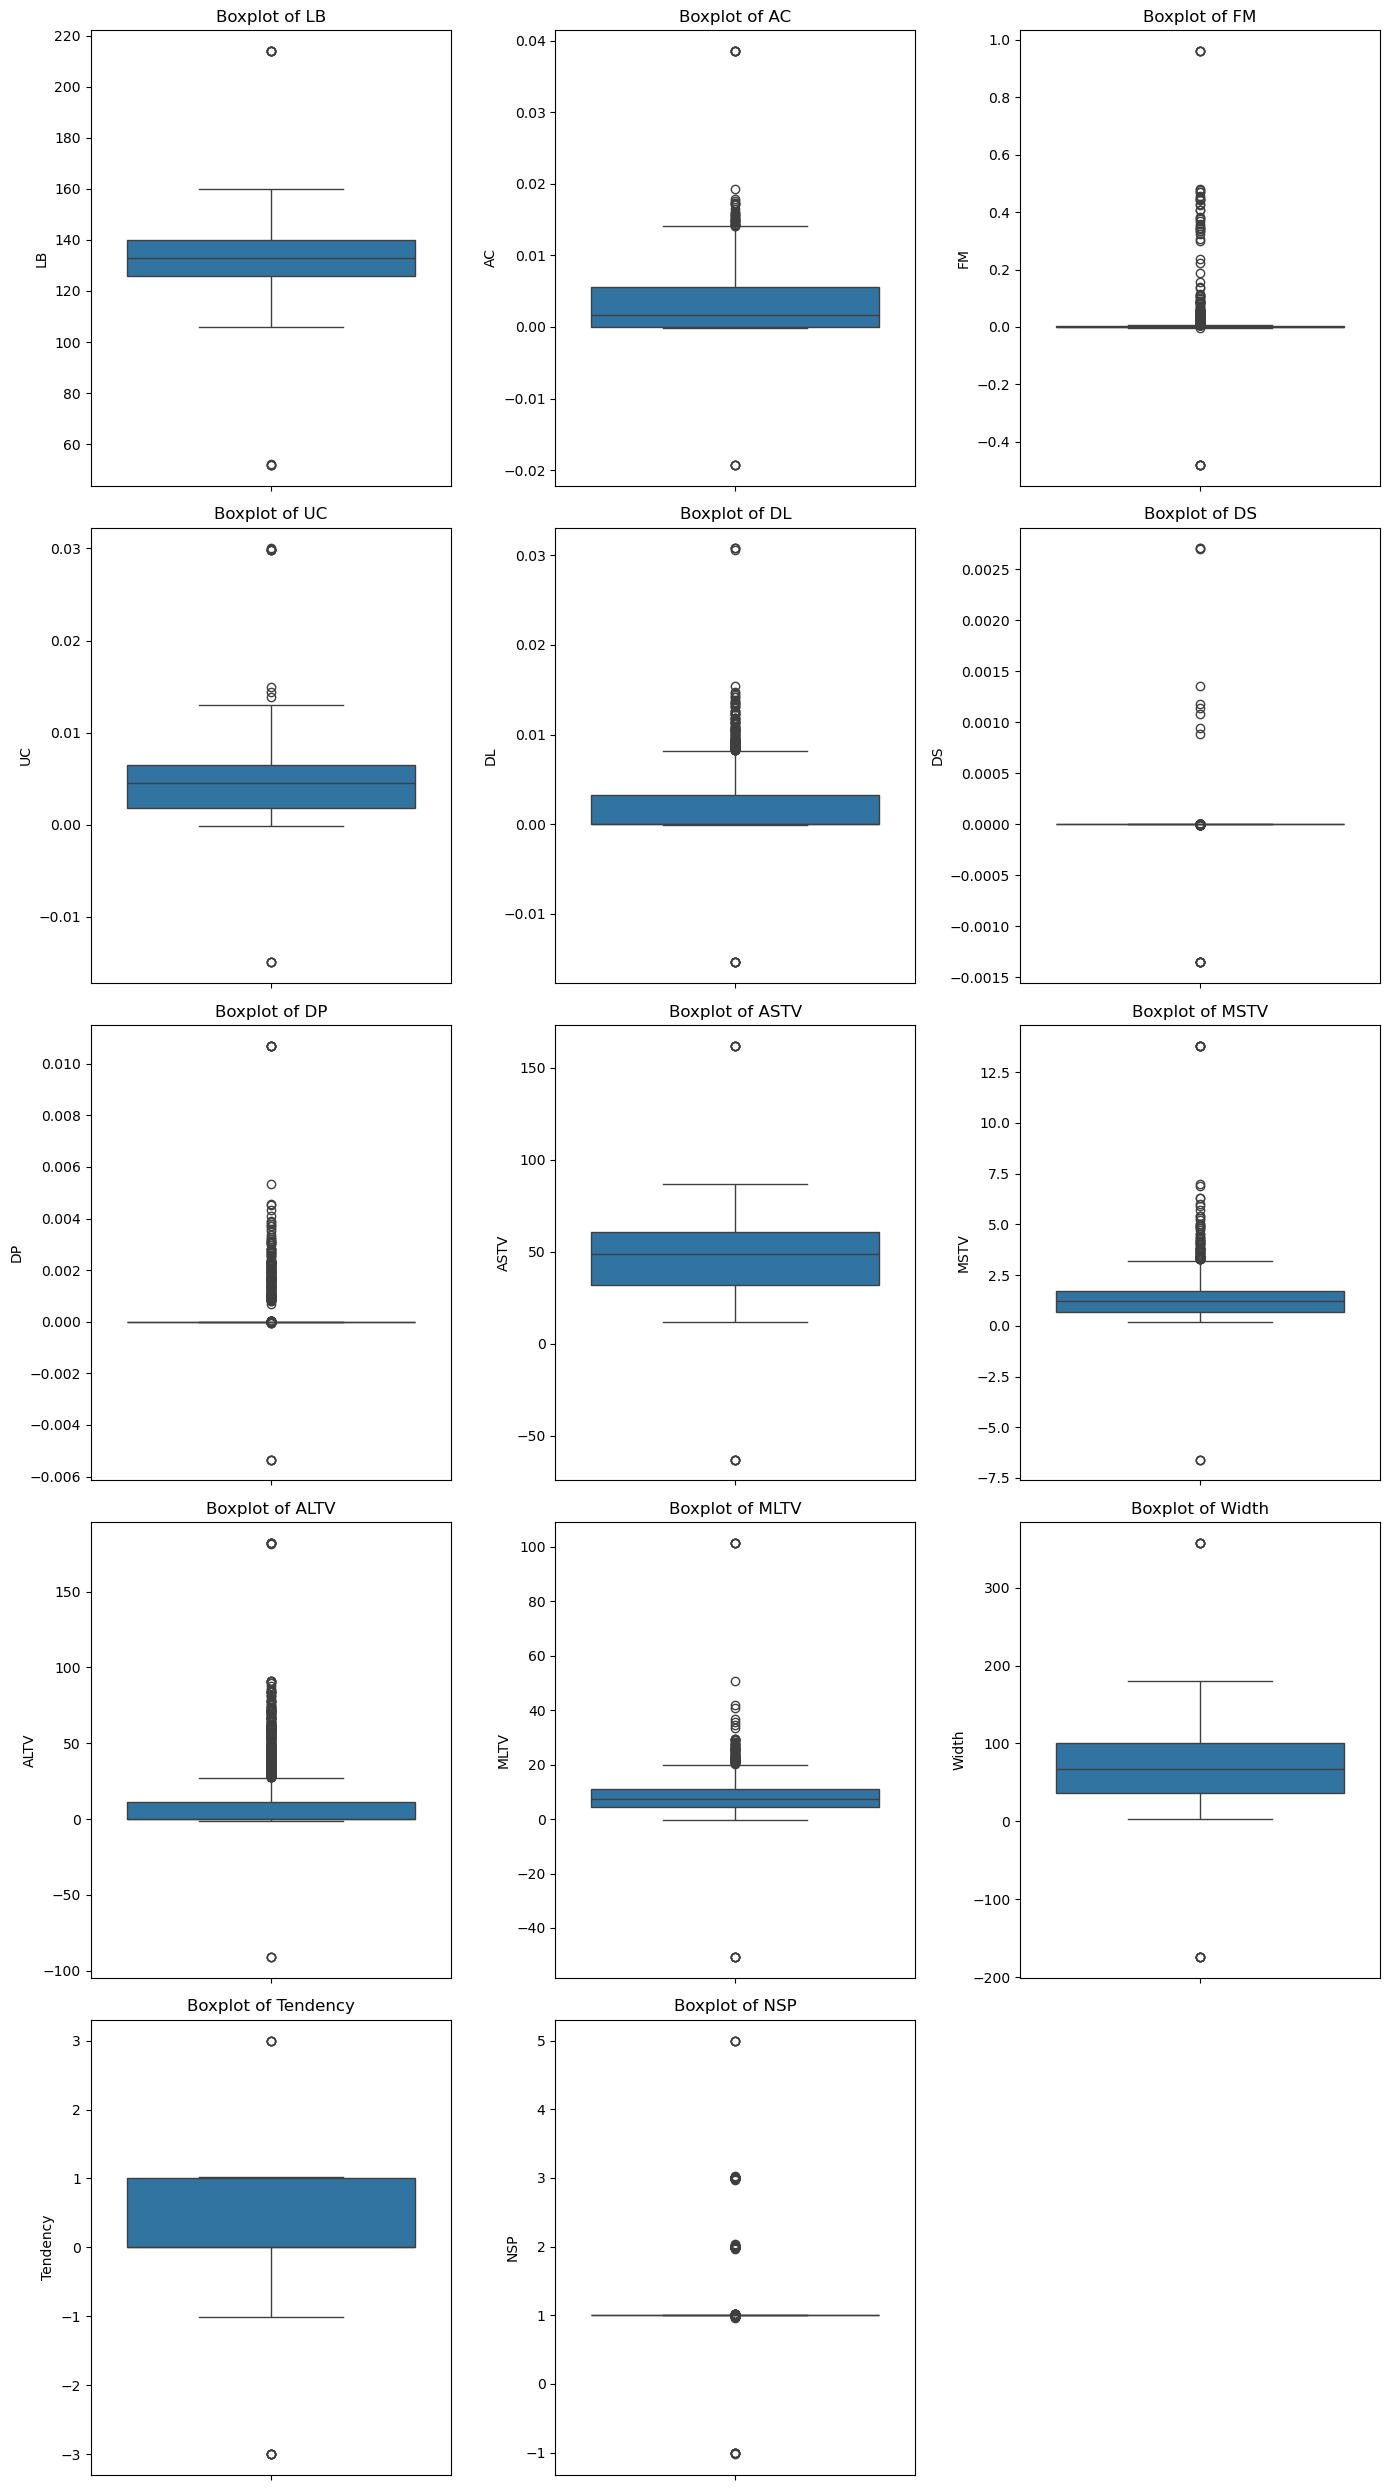

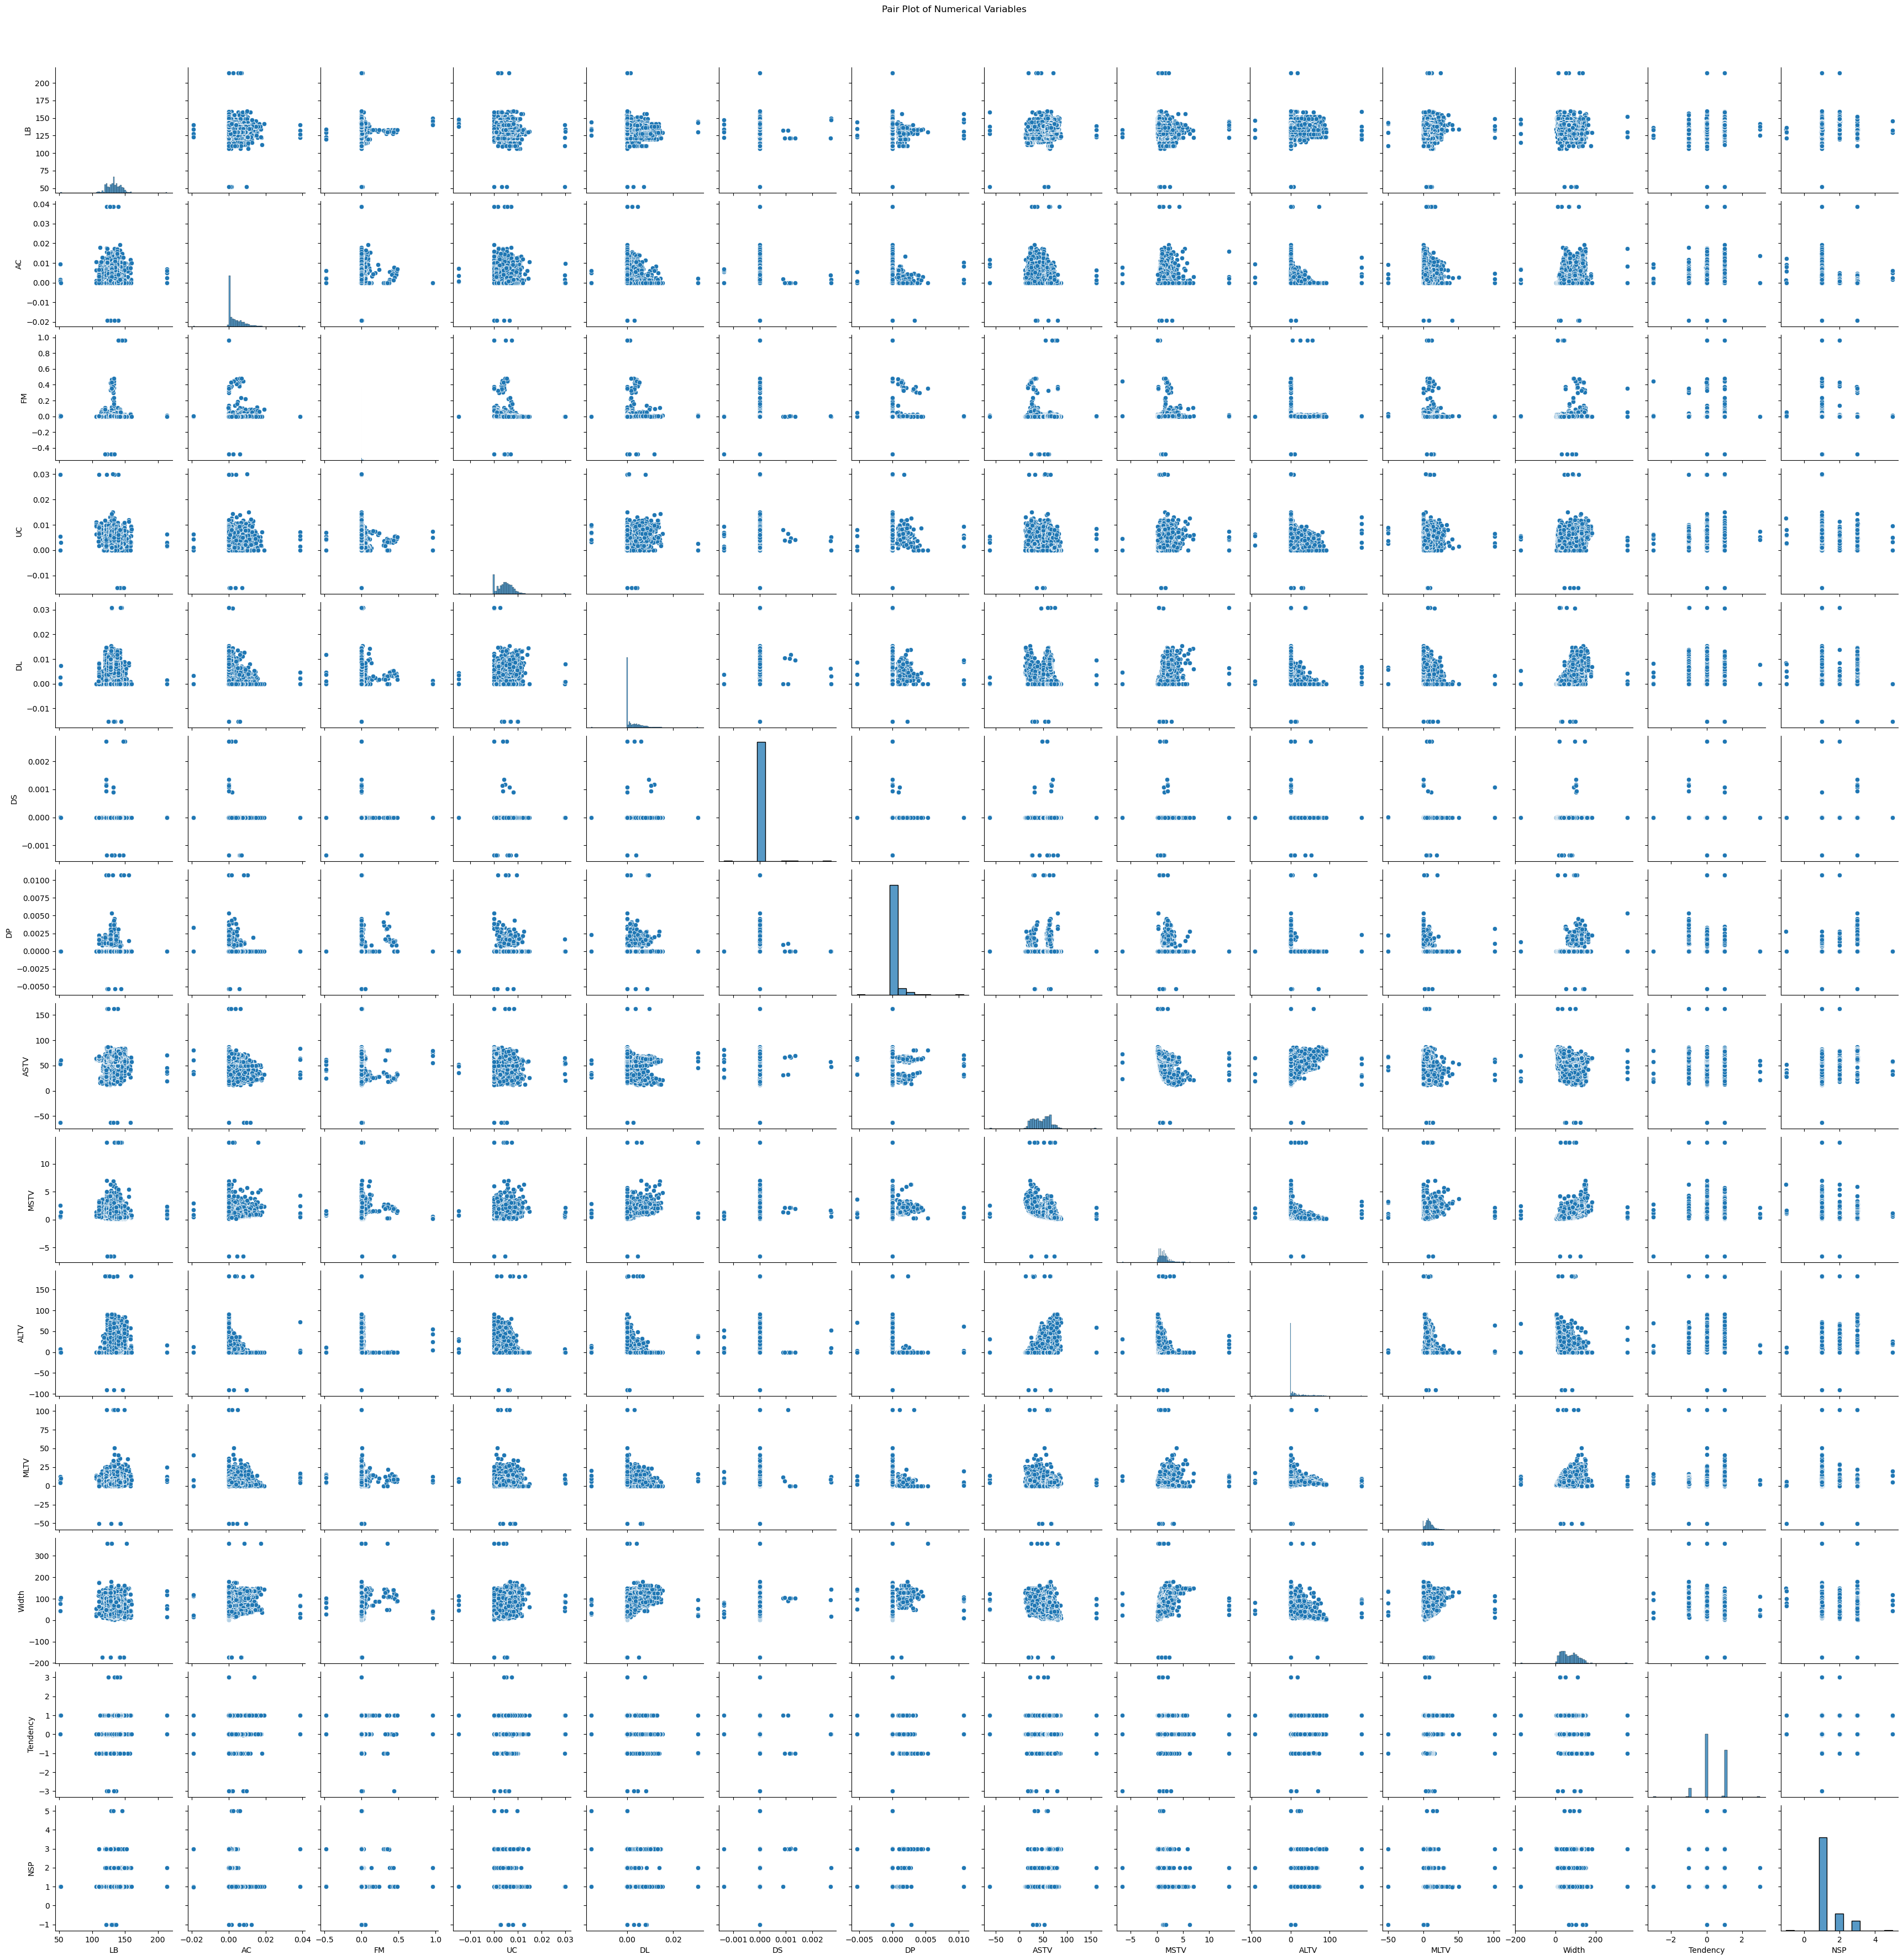

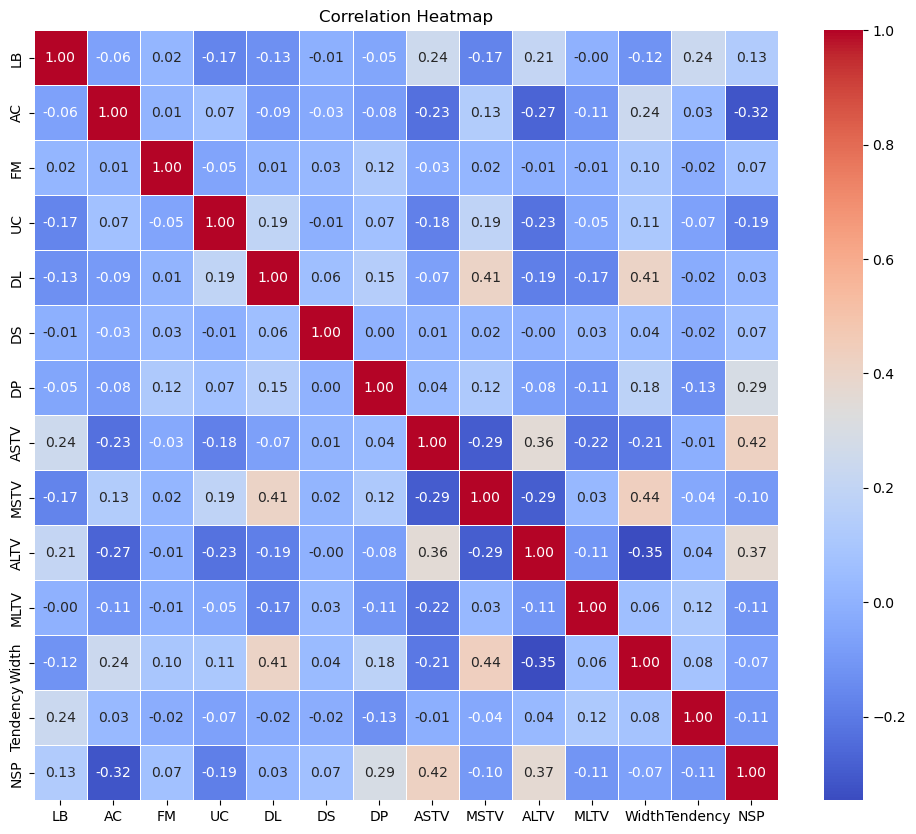

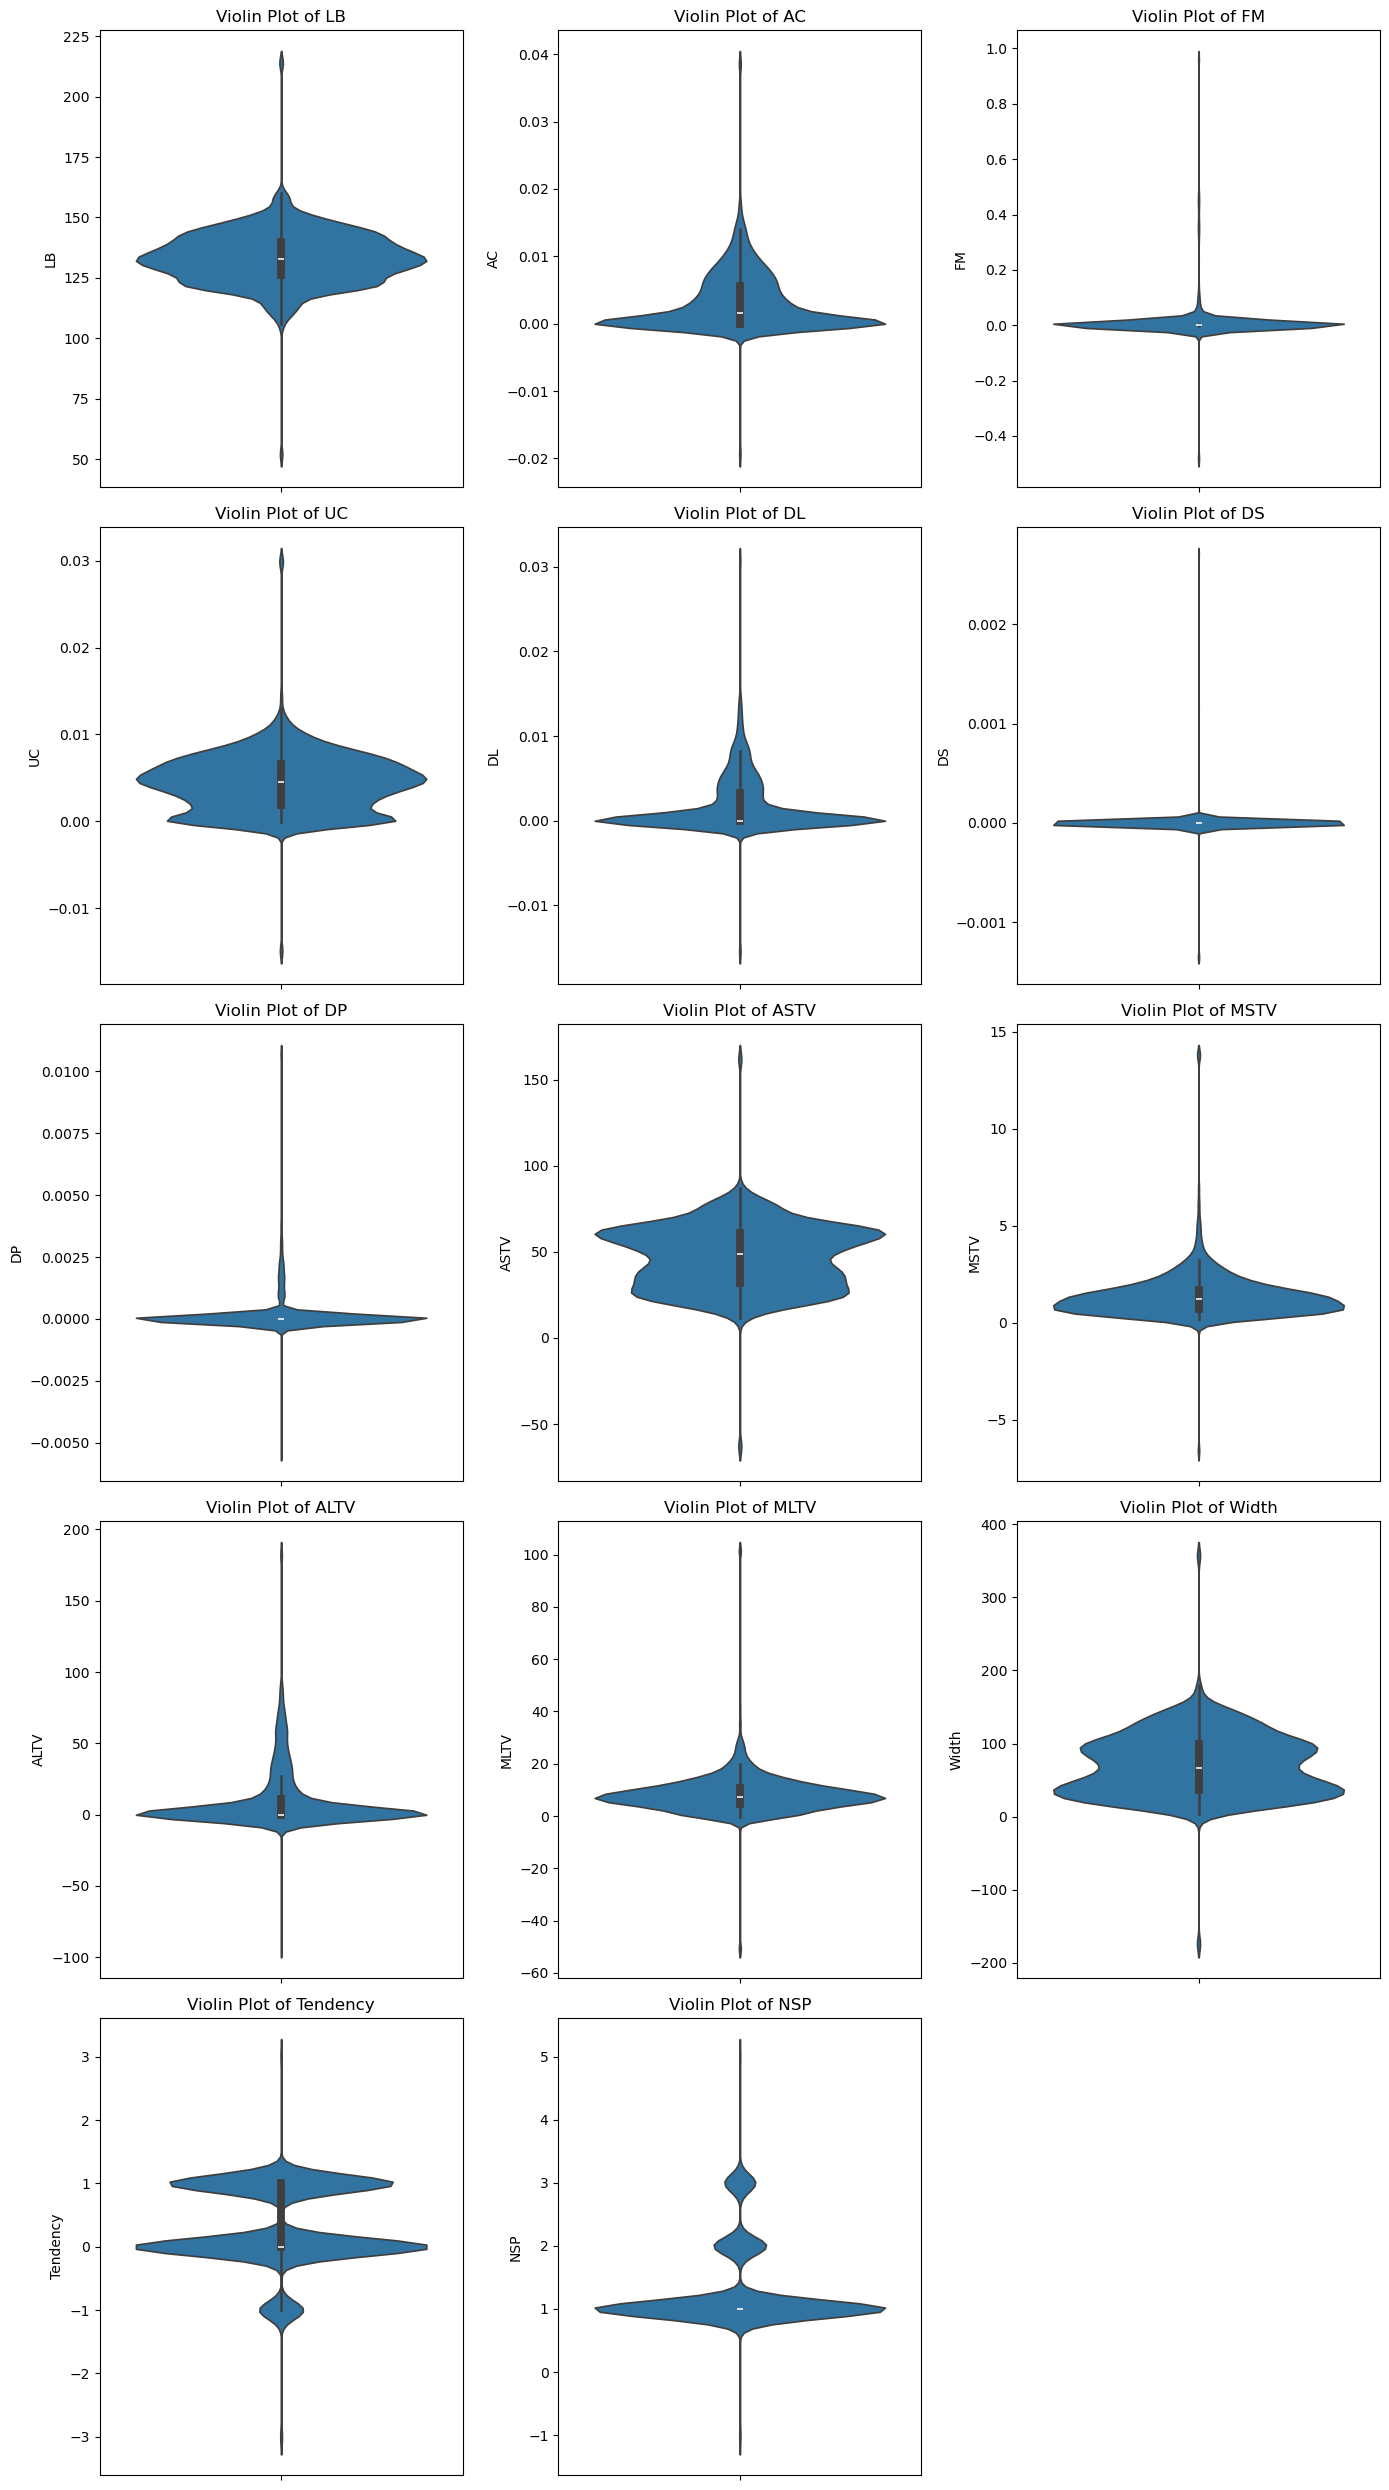

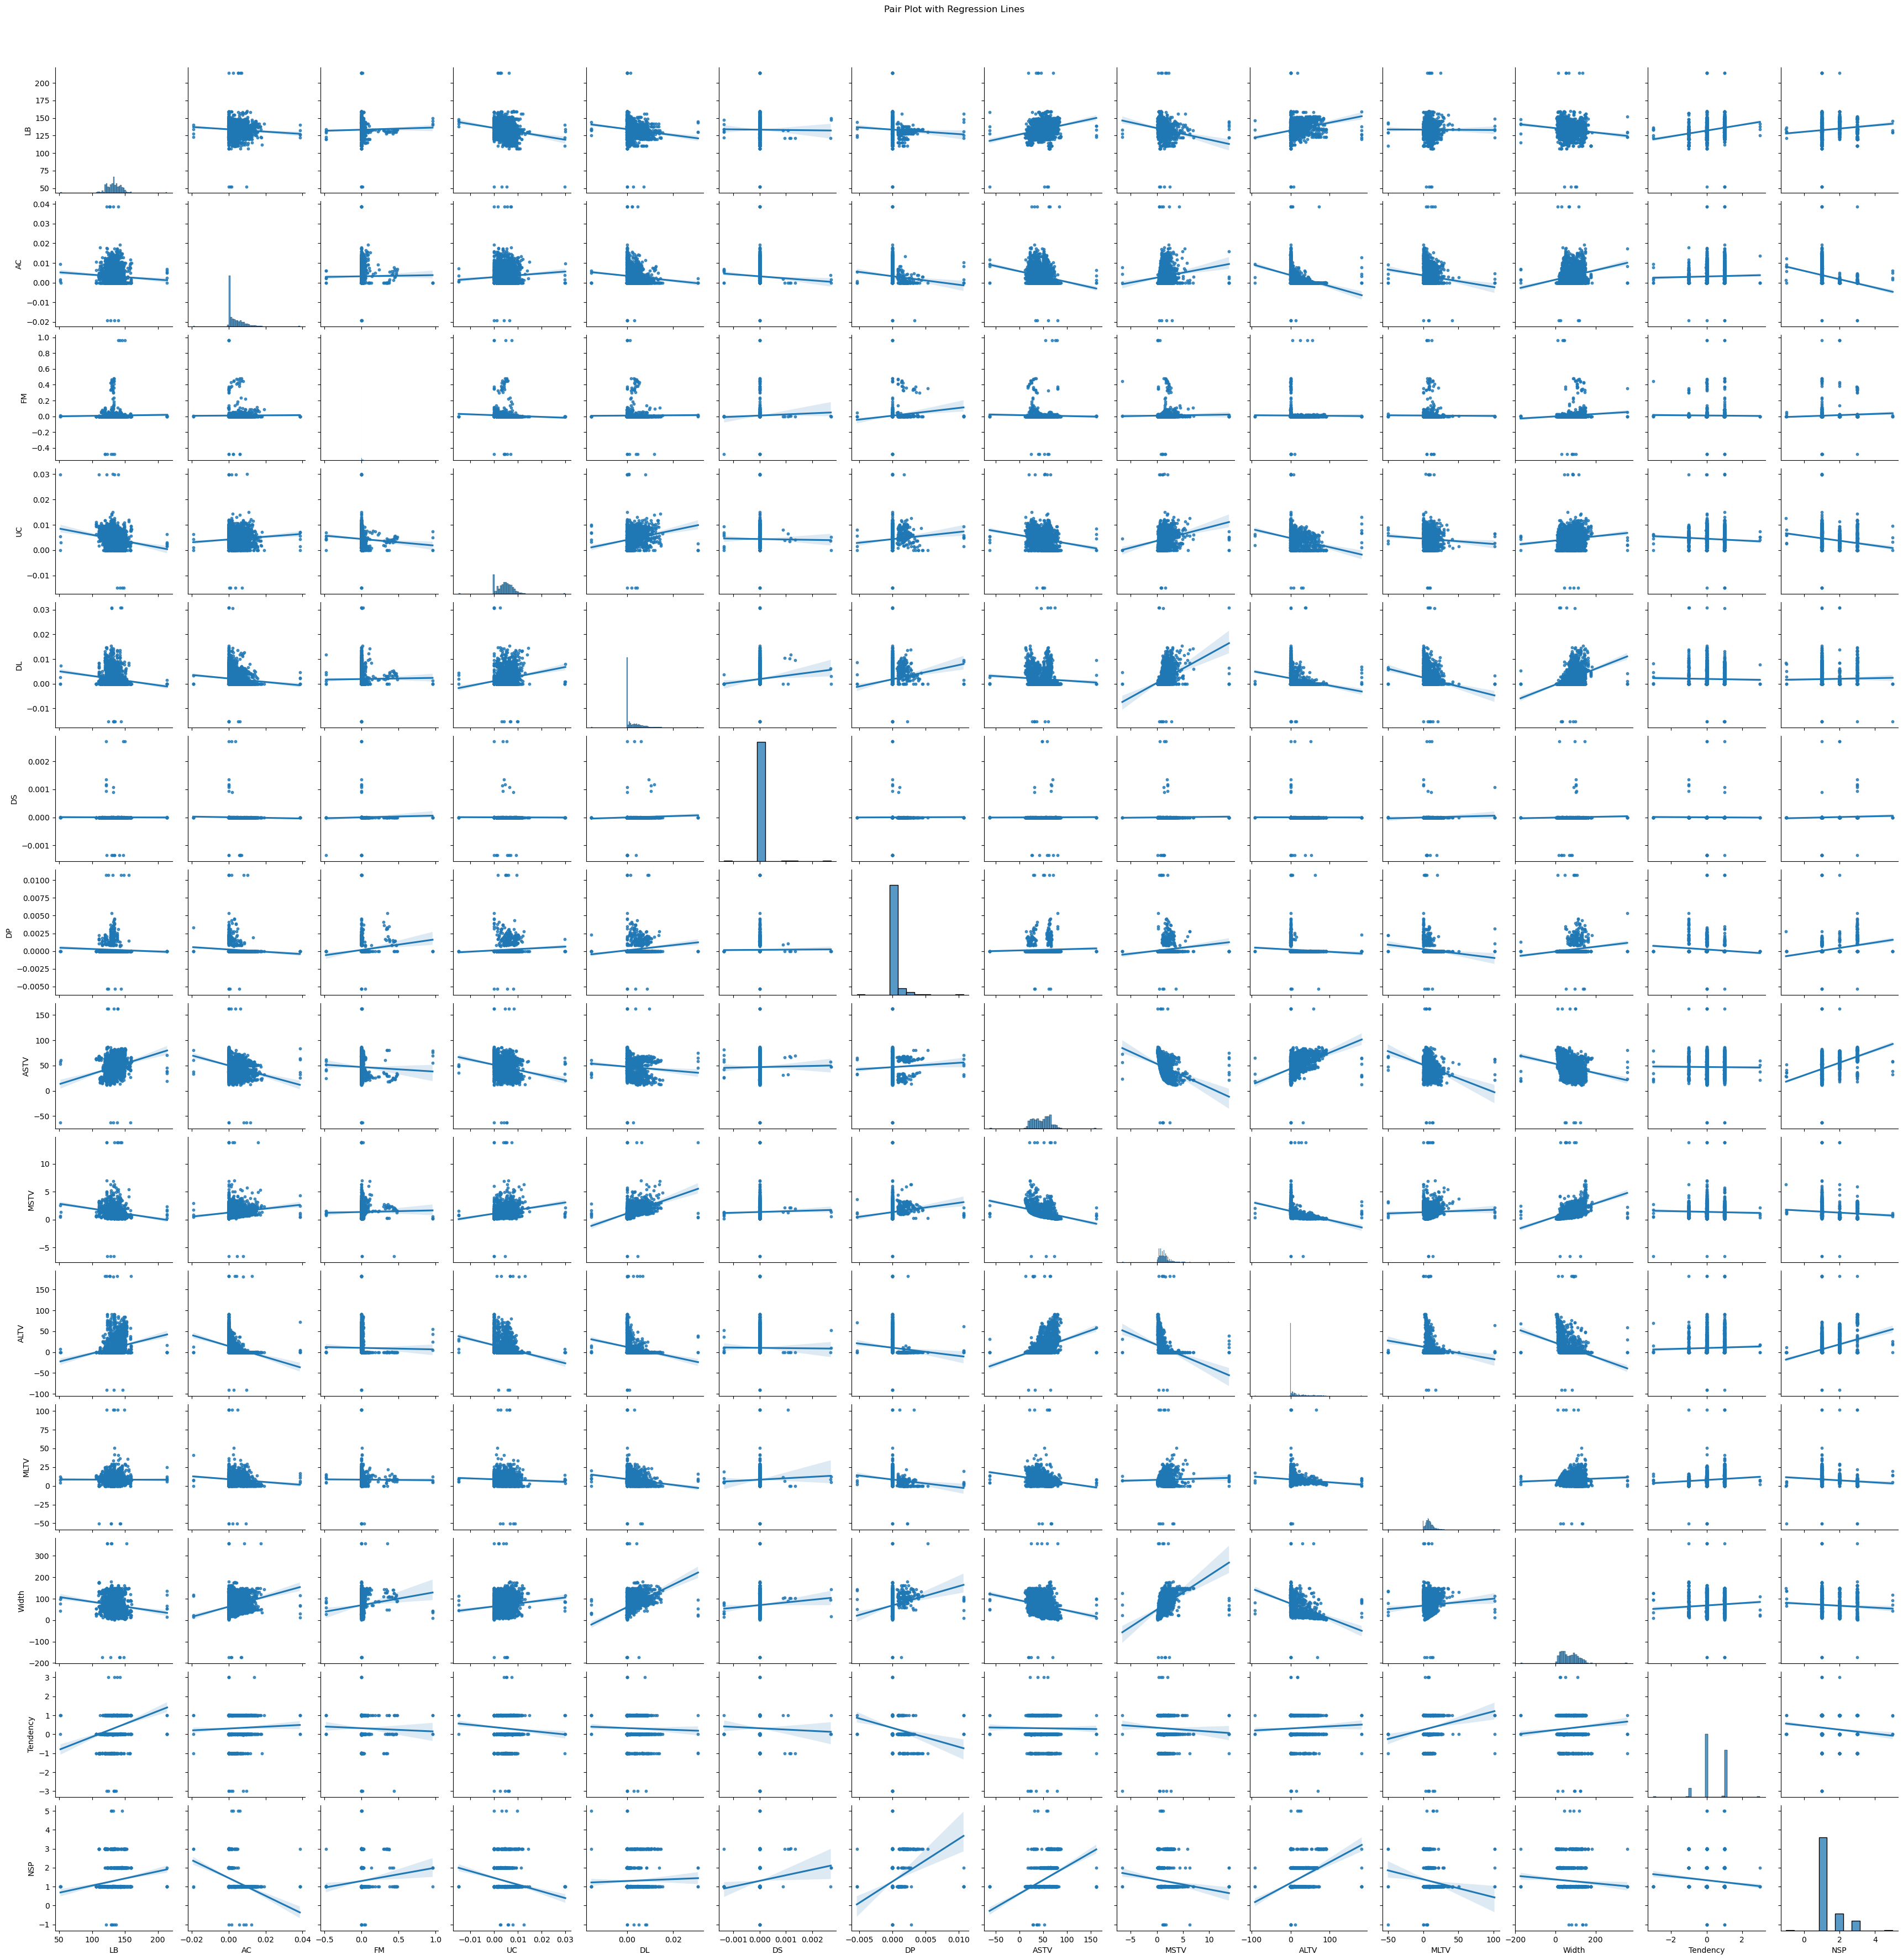

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\EDA1 (1)\\EDA1\\Cardiotocographic.csv")

# Display the first few rows to understand the structure
print(df.head())

# Plot histograms for numerical variables
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Plot boxplots for numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)
cols = 3  # Number of columns in the subplot grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows needed

plt.figure(figsize=(14, 5 * rows))
for i, column in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.show()

# Plot pie charts for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.show()

# Plot scatter plots for pairs of numerical variables
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Plot violin plots for numerical variables
plt.figure(figsize=(14, 5 * rows))
for i, column in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.violinplot(y=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Generate a heatmap of pairwise relationships using Seaborn's pairplot
sns.pairplot(df[num_cols], kind='reg', plot_kws={'scatter_kws': {'s': 10}})
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.07

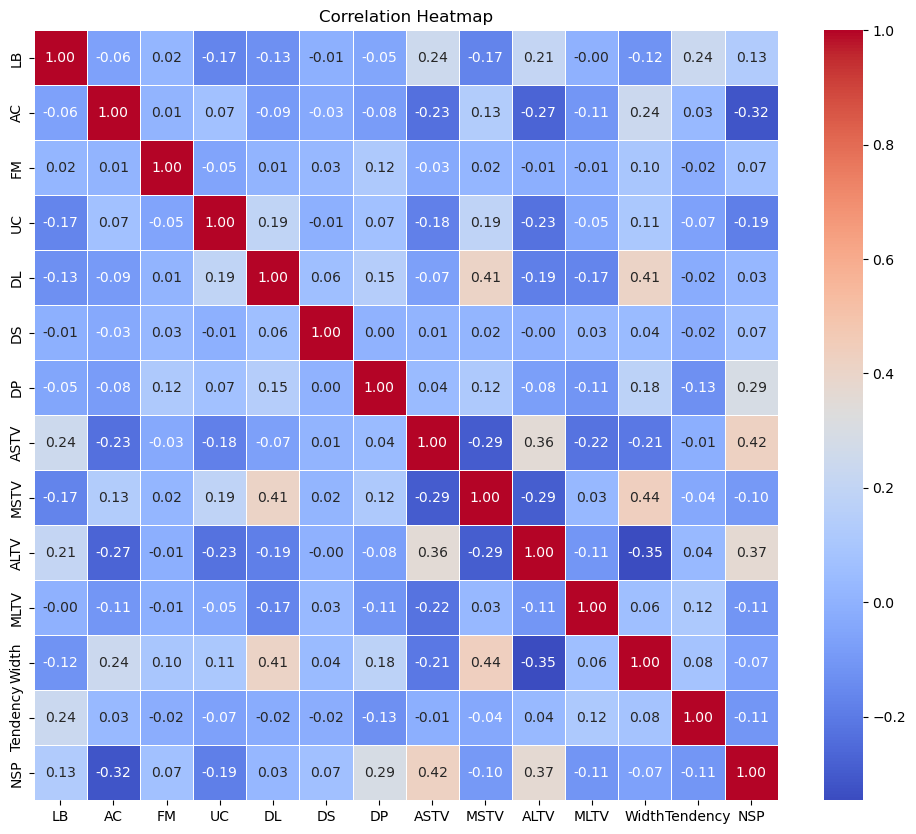

No 'timestamp' column found. Please check the dataset for a suitable time variable.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\mukes\\Downloads\\EDA1 (1)\\EDA1\\Cardiotocographic.csv")

# Display the first few rows and columns to understand the structure
print(df.head())
print(df.columns)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Check if a timestamp column exists
# If there's a suitable column for datetime, rename 'timestamp' to the actual name
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Resample data to a suitable frequency (e.g., daily)
    resampled_data = df.resample('D').mean()

    # Plot the trends over time for key variables
    plt.figure(figsize=(14, 8))
    for column in ['LB', 'AC', 'FM', 'UC']:  # Include other key columns as needed
        plt.plot(resampled_data.index, resampled_data[column], label=column)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Trends Over Time')
    plt.legend()
    plt.show()

    # Example: Group by `UC` (Uterine Contractions) and calculate means of other variables
    grouped_data = df.groupby('UC').mean()

    # Plot the means of key variables
    plt.figure(figsize=(14, 8))
    for column in ['LB', 'AC', 'FM', 'DL']:  # Include other key columns as needed
        plt.plot(grouped_data.index, grouped_data[column], label=column)

    plt.xlabel('Uterine Contractions')
    plt.ylabel('Mean Value')
    plt.title('Patterns by Uterine Contractions')
    plt.legend()
    plt.show()
else:
    print("No 'timestamp' column found. Please check the dataset for a suitable time variable.")
